# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Haniff
- **Email:** toha.hanif341@gmail.com
- **ID Dicoding:** muhammadhaniff


## Business Question

1. How can we maximize revenue from high-value product categories?
2. How can we improve profitability in lower-revenue categories?
3. How can we optimize performance during seasonal peaks and ensure consistent revenue growth throughout the year?
4. How can we improve delivery times to enhance customer satisfaction and drive repeat business?
5. How can we reduce over-reliance on some state for sales and customer base?
6. How can we improve customer retention and drive repeat purchases?

## Import All Library/Packages

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
import matplotlib.patches as patches

import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data

In [ ]:
import gdown
import zipfile

file_id = "1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK"
url = f"https://drive.google.com/uc?export=download&id={file_id}"  # Replace with your file ID
output_filename = "E-Commerce-Public-Dataset.zip"  # Adjust the filename if needed

gdown.download(url, output_filename, quiet=False)

with zipfile.ZipFile(output_filename, 'r') as zip_ref:
    zip_ref.extractall()  # Extract all files to the current directory

### Assessing Data

In [2]:
customers_df = pd.read_csv("E-Commerce-Public-Dataset/customers_dataset.csv")
geolocation_df = pd.read_csv("E-Commerce-Public-Dataset/geolocation_dataset.csv")
order_items_df = pd.read_csv("E-Commerce-Public-Dataset\order_items_dataset.csv")
order_payments_df = pd.read_csv("E-Commerce-Public-Dataset\order_payments_dataset.csv")
order_reviews_df = pd.read_csv("E-Commerce-Public-Dataset\order_reviews_dataset.csv")
orders_df = pd.read_csv("E-Commerce-Public-Dataset\orders_dataset.csv")
product_category_df = pd.read_csv("E-Commerce-Public-Dataset\product_category_name_translation.csv")
products_df = pd.read_csv("E-Commerce-Public-Dataset\products_dataset.csv")
sellers_df = pd.read_csv("E-Commerce-Public-Dataset\sellers_dataset.csv")

In [3]:
# List of dataframes
dataframes = [
    customers_df,
    sellers_df,
    orders_df,
    order_payments_df,
    order_reviews_df,
    order_items_df,
    products_df,
    product_category_df,
    geolocation_df
]

# List of dataframe names for reference
dataframe_names = [
    'customers_df',
    'sellers_df',
    'orders_df',
    'order_payments_df',
    'order_reviews_df',
    'order_items_df',
    'products_df',
    'product_category_df',
    'geolocation_df'
]

In [4]:
for df, name in zip(dataframes, dataframe_names):
    print(f"{name}: {df.shape}")

customers_df: (99441, 5)
sellers_df: (3095, 4)
orders_df: (99441, 8)
order_payments_df: (103886, 5)
order_reviews_df: (99224, 7)
order_items_df: (112650, 7)
products_df: (32951, 9)
product_category_df: (71, 2)
geolocation_df: (1000163, 5)


In [5]:
for df, name in zip(dataframes, dataframe_names):
    print(f"--- {name} ---")
    print(df.info(), "\n")

--- customers_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

--- sellers_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object

In [6]:
for df, name in zip(dataframes, dataframe_names):
    print(f"--- {name} ---")
    print(df.head(), "\n")

--- customers_df ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

--- sellers_df ---
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15             

#### Dataset Relations
there are 9 Datasets,

8 of the dataset wwhich are:
- customers_df: Contains information about customers who placed orders.
- order_items_df: contains details of items in each order
- order_payments_df: payment details for each order
- order_reviews_df: reviews left by customers for their orders
- orders_df: details of each order placed on the platform
- products_df: details about the products available on the platform
- sellers_df: information about the sellers on the platform
- geolocation_df: provide geolocation details for ZIP code prefixes

Dataset relations shows in the picture
<img src="E-Commerce-Public-Dataset\dataset_relations.jpg" width="700" height="450" alt="Image description">
other 1 dataset are:
- product_category_df: Translation of product categories from Portugese to English

### Data Cleaning

#### Handle Duplicates

In [7]:
# Check for duplicates in each dataframe
for df, name in zip(dataframes, dataframe_names):
    duplicates = df.duplicated().sum()
    print(f"{name} : {duplicates} duplicates.")

customers_df : 0 duplicates.
sellers_df : 0 duplicates.
orders_df : 0 duplicates.
order_payments_df : 0 duplicates.
order_reviews_df : 0 duplicates.
order_items_df : 0 duplicates.
products_df : 0 duplicates.
product_category_df : 0 duplicates.
geolocation_df : 261831 duplicates.


In [8]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


The duplicate values in geolocation_df is ignore because it represent location from each customer that possibly live in same area

#### Handle Null Values

In [9]:
for df, name in zip(dataframes, dataframe_names):
    null_values = df.isnull().sum().sum()
    print(f"{name} : {null_values} null")

customers_df : 0 null
sellers_df : 0 null
orders_df : 4908 null
order_payments_df : 0 null
order_reviews_df : 145903 null
order_items_df : 0 null
products_df : 2448 null
product_category_df : 0 null
geolocation_df : 0 null


##### orders_df Null Value

In [10]:
print(orders_df.isnull().sum())
print(orders_df.isnull().sum().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
4908


**order_approved_at column**

In [11]:
print(orders_df[orders_df['order_approved_at'].isnull()].order_status.value_counts())
print(orders_df[orders_df['order_approved_at'].isnull()].order_status.value_counts().sum())

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64
160


For null value in order_approved_at  with 
- order_status "cancelled" & "created" is ignored because the order has been cancelled or just created, so no action is required. 
- However, for null values with the order_status "delivered", since the data only represent less than 0.005%, we filled the data as in order_delivered_carrier_date, assuming that it was approved in the same day as it was handed to carrier services

In [12]:
orders_df[(orders_df['order_status']=='delivered') & (orders_df['order_approved_at'].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


In [13]:
ignored_statuses = ['cancelled', 'created']
ignored_rows = orders_df['order_status'].isin(ignored_statuses)

#Identifies row to fill na
delivered_rows_with_null = (orders_df['order_status'] == 'delivered') & (orders_df['order_approved_at'].isnull())

# Fill 'order_approved_at' with values from 'order_delivered_carrier_date' for 'delivered' orders
orders_df.loc[delivered_rows_with_null, 'order_approved_at'] = orders_df.loc[delivered_rows_with_null, 'order_delivered_carrier_date']


In [14]:
orders_df[(orders_df['order_status']=='delivered') & (orders_df['order_approved_at'].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


**order_delivered_carrier_date column**

In [15]:
print(orders_df[orders_df['order_delivered_carrier_date'].isnull()].order_status.value_counts())
print(orders_df[orders_df['order_delivered_carrier_date'].isnull()].order_status.value_counts().sum())

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64
1783


For null values in order_delivered_carrier_date,
- rows with order_status "unavailable", "canceled", "invoiced", "processing", "created", "approved", is being ignored since the order is not yet handed to delivery carrier.
- for the null values with order_status "delivered", since it was only 2 out of 261831 we fill the null with order_approved_at value, assuming the order is handed to the delivery carrier the same day

In [16]:
orders_df[(orders_df['order_status']=='delivered') & (orders_df['order_delivered_carrier_date'].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00


In [17]:
ignored_statuses = ['unavailable', 'canceled', 'invoiced', 'processing', 'created', 'approved']
ignored_rows = orders_df['order_status'].isin(ignored_statuses)

#Identifies row to fill na
delivered_rows_with_null = (orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_carrier_date'].isnull())

# Fill 'order_delivered_carrier_date' with values from 'order_approved_at' for 'delivered' orders
orders_df.loc[delivered_rows_with_null, 'order_delivered_carrier_date'] = orders_df.loc[delivered_rows_with_null, 'order_approved_at']


In [18]:
orders_df[(orders_df['order_status']=='delivered') & (orders_df['order_delivered_carrier_date'].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


**order_delivered_customer_date column**

In [19]:
print(orders_df[orders_df['order_delivered_customer_date'].isnull()].order_status.value_counts())
print(orders_df[orders_df['order_delivered_customer_date'].isnull()].order_status.value_counts().sum())

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64
2965


For null values in order_delivered_customer_date,
- rows with order_status "shipped", "unavailable", "canceled", "invoiced", "processing", "created", "approved", is being ignored since it was not received by the customer.
- for the null values with order_status "delivered", since it was only 8 out of 261831 we fill the null with order_estimated_delivery_date value, assuming the order is received by the customer the same date as it was estimated

In [20]:
orders_df[(orders_df['order_status']=='delivered') & (orders_df['order_delivered_customer_date'].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:30:16,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


In [21]:
ignored_statuses = ['shipped', 'unavailable', 'canceled', 'invoiced', 'processing', 'created', 'approved']
ignored_rows = orders_df['order_status'].isin(ignored_statuses)

#Identifies row to fill na
delivered_rows_with_null = (orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isnull())

# Fill 'order_delivered_customer_date' with values from 'order_estimated_delivery_date' for 'delivered' orders
orders_df.loc[delivered_rows_with_null, 'order_delivered_customer_date'] = orders_df.loc[delivered_rows_with_null, 'order_estimated_delivery_date']


In [22]:
orders_df[(orders_df['order_status']=='delivered') & (orders_df['order_delivered_customer_date'].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


##### orders_reviews_df Null Values

In [23]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

For the order_reviews_df, the null value was found in `review_comment_title` column and `review_comment_message` column, since there was a review score without comment and title, we just ignored the null values

##### products_df Null Values

In [24]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Check that the product_id in product_df are in 'order_items_df', to check if the product are being purchased or not

In [25]:
ordered_product_ids = list(order_items_df['product_id'])

In [26]:
unordered_products = products_df[~products_df['product_id'].isin(ordered_product_ids)]
print(f"Number of products not present in orders: {len(unordered_products)}")
unordered_products.head()

Number of products not present in orders: 0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


since all product has being ordered, so we just ignored the null value as we might missing some valuable information through the ordered product. so we just replacing column with object datatype such product_name_lenght and product_name_lenght with "unkown" and "unavailable"

In [27]:
products_df['product_category_name'].fillna('unknown', inplace=True)
products_df['product_name_lenght'].fillna('unknown', inplace=True)

In [28]:
products_df.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### Handle Datatype correction

In [29]:
# Convert date columns in orders_df
date_columns_orders = [
    'order_purchase_timestamp', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]
for col in date_columns_orders:
    orders_df[col] = pd.to_datetime(orders_df[col])

# Convert date column in order_items_df
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Convert date columns in order_reviews_df
date_columns_reviews = ['review_creation_date', 'review_answer_timestamp']
for col in date_columns_reviews:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

In [30]:
print("Data types in orders_df:")
print(orders_df[date_columns_orders].dtypes)
print("\nData types in order_items_df:")
print(order_items_df['shipping_limit_date'].dtype)
print("\nData types in order_reviews_df:")
print(order_reviews_df[date_columns_reviews].dtypes)

Data types in orders_df:
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Data types in order_items_df:
datetime64[ns]

Data types in order_reviews_df:
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


#### Handle Language Correction

In [31]:
# Create a mapping dictionary from product_category_df
category_translation = dict(zip(product_category_df['product_category_name'], product_category_df['product_category_name_english']))

# converting product_category_name from portugese into english
products_df['product_category_name'] = products_df['product_category_name'].map(category_translation)

# Verify the changes
print(products_df[['product_category_name']].head())

  product_category_name
0             perfumery
1                   art
2        sports_leisure
3                  baby
4            housewares


## Exploratory Data Analysis (EDA)

### customer_df

#### Univariate Analysis

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64


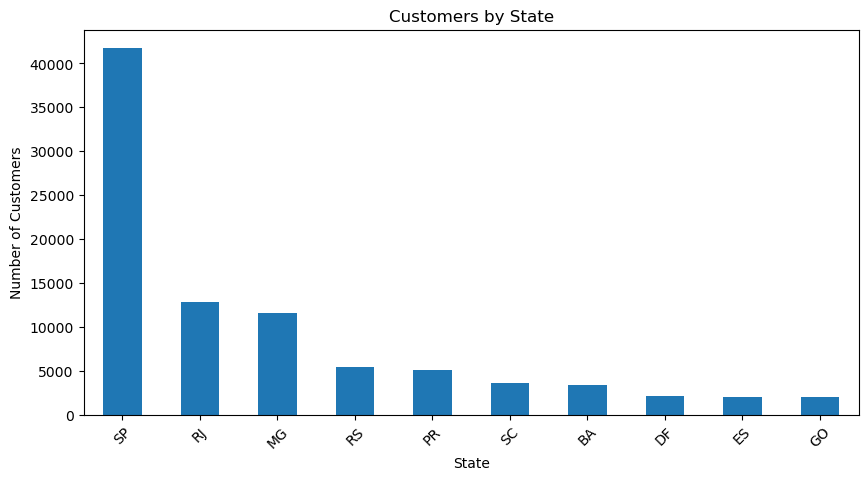

In [39]:
# Distribution of customers by state
state_distribution = customers_df['customer_state'].value_counts().head(10)
print(state_distribution)

# Plot the distribution
state_distribution.plot(kind='bar', figsize=(10, 5), title="Customers by State")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


- Insight: most of our customer was from state of SP (São Paulo), folowwed by state of RJ (Rio de Jeniro), and state of SP MG (Minas Gerais)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


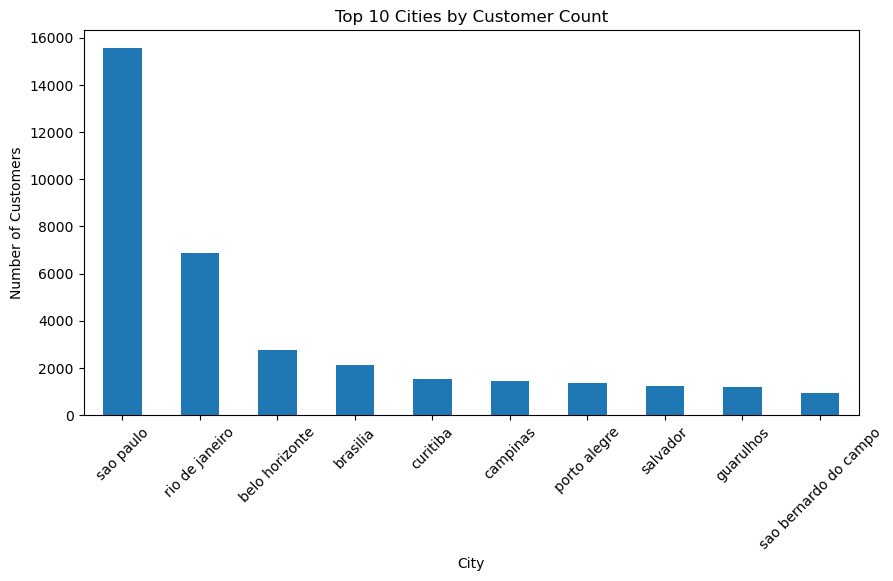

In [40]:
# Top 10 cities by customer count
city_distribution = customers_df['customer_city'].value_counts().head(10)
print(city_distribution)

# Plot the top 10 cities
city_distribution.plot(kind='bar', figsize=(10, 5), title="Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

- Insight: by city, most of our customer was from SP (São Paulo) city, followed by RJ (Rio de Jeniro) city, and MG (Minas Gerais) city

#### Bivariate Analysis

customer_state
SP    5591
MG    1349
RJ    1199
RS     877
PR     861
BA     735
GO     540
SC     517
DF     465
PE     439
Name: customer_zip_code_prefix, dtype: int64


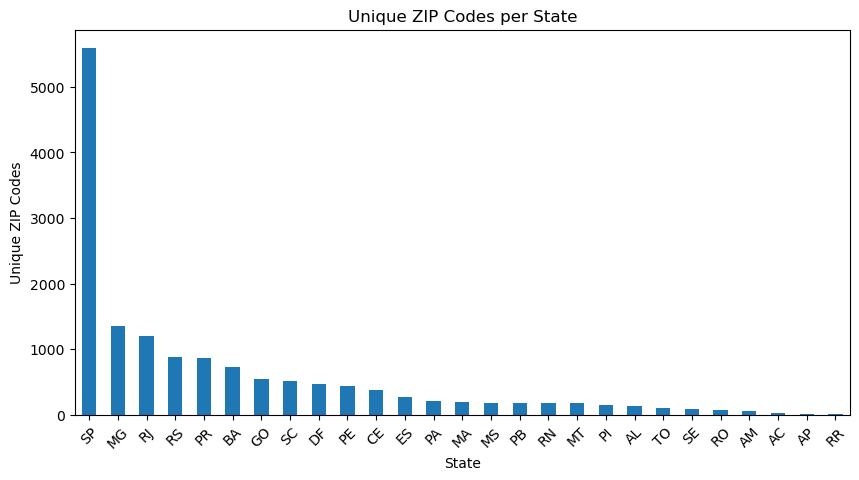

In [43]:
# Number of unique ZIP codes per state
zip_codes_per_state = customers_df.groupby('customer_state')['customer_zip_code_prefix'].nunique()
print(zip_codes_per_state.sort_values(ascending=False).head(10))

# Plot unique ZIP codes by state
zip_codes_per_state.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Unique ZIP Codes per State")
plt.xlabel("State")
plt.ylabel("Unique ZIP Codes")
plt.xticks(rotation=45)
plt.show()

- Insight: States with higher customer counts also have a greater number of unique ZIP codes, indicating broader geographic coverage.

In [46]:
# Top 5 states and their top cities
top_states = state_distribution.head(5).index
top_states_cities = customers_df[customers_df['customer_state'].isin(top_states)]
city_by_state = top_states_cities.groupby(['customer_state', 'customer_city']).size().unstack(fill_value=0)
city_by_state

customer_city,abadia dos dourados,abaete,abatia,abre campo,acaiaca,acegua,acucena,adamantina,adhemar de barros,adolfo,...,vitorinos,volta grande,volta redonda,votorantim,votuporanga,wenceslau braz,werneck,xambre,xangri-la,zacarias
customer_state,,,,,,,,,,,,,,,,,,,,,
MG,3,12,0,6,2,0,1,0,0,0,...,1,4,0,0,0,0,0,0,0,0
PR,0,0,3,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,2,0,0
RJ,0,0,0,0,0,0,0,0,0,0,...,0,0,232,0,0,0,2,0,0,0
RS,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0
SP,0,0,0,0,0,0,0,36,0,5,...,0,0,0,85,63,0,0,0,0,2


- Insight: The dominant cities in the top states account for a significant portion of the customer base.

#### Multivariate Analysis

customer_state
RJ    10.718932
MG     8.624907
ES     7.671698
SP     7.466643
SC     7.034816
RS     6.232611
PR     5.859466
MT     5.182857
PA     4.665072
DF     4.602151
dtype: float64


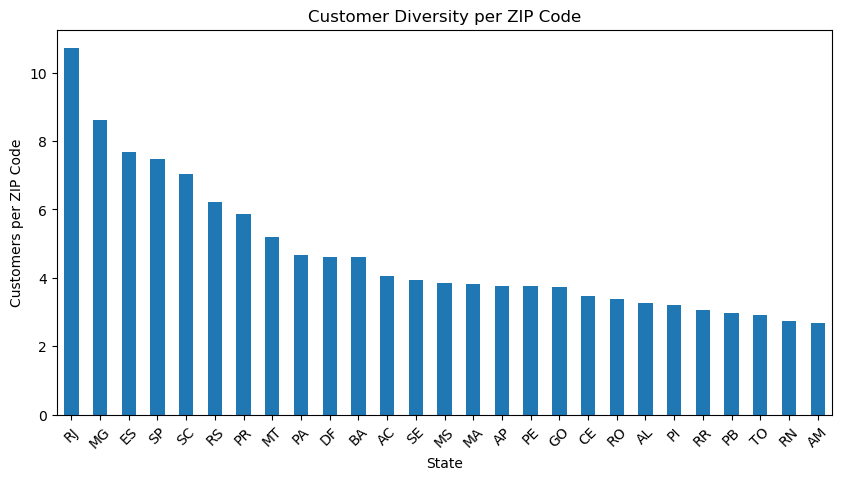

In [48]:
# Diversity index: customers per unique ZIP code in each state
customers_per_zip = customers_df.groupby('customer_state')['customer_id'].count() / zip_codes_per_state
print(customers_per_zip.sort_values(ascending=False).head(10))

# Plot diversity index
customers_per_zip.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Customer Diversity per ZIP Code")
plt.xlabel("State")
plt.ylabel("Customers per ZIP Code")
plt.xticks(rotation=45)
plt.show()

- Insight: Some states have denser customer bases per ZIP code, indicating potential urban concentration.

#### Numerical Analysis

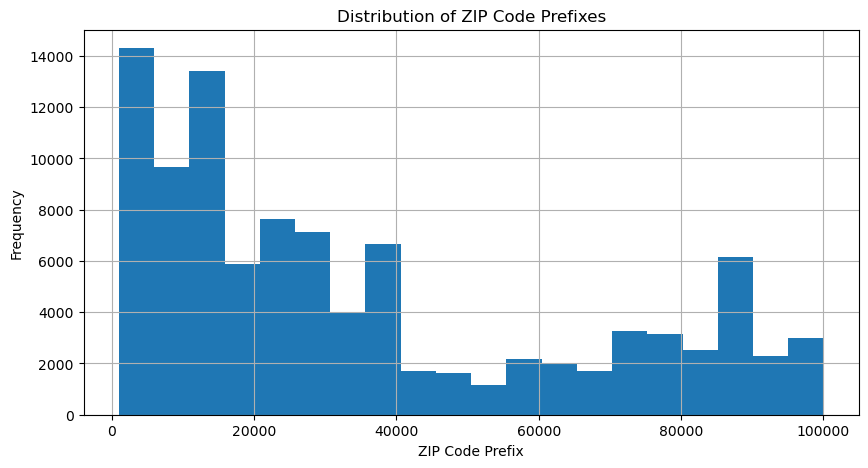

count    99441.000000
mean     35137.474583
std      29797.938996
min       1003.000000
25%      11347.000000
50%      24416.000000
75%      58900.000000
max      99990.000000
Name: customer_zip_code_prefix, dtype: float64

In [71]:
# Range and distribution of ZIP code prefixes
customers_df['customer_zip_code_prefix'].hist(bins=20, figsize=(10, 5))
plt.title("Distribution of ZIP Code Prefixes")
plt.xlabel("ZIP Code Prefix")
plt.ylabel("Frequency")
plt.show()
customers_df['customer_zip_code_prefix'].describe()

- Insight: The distribution of ZIP codes provides insights into the geographic spread of customers.

#### Categorical Analysis

In [50]:
# Unique values
print(f"Unique states: {customers_df['customer_state'].nunique()}")
print(f"Unique cities: {customers_df['customer_city'].nunique()}")

Unique states: 27
Unique cities: 4119


- Insight: There is a high level of diversity in cities, indicating potential opportunities for localized marketing efforts.

### orders_df

#### Univariate Analysis

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


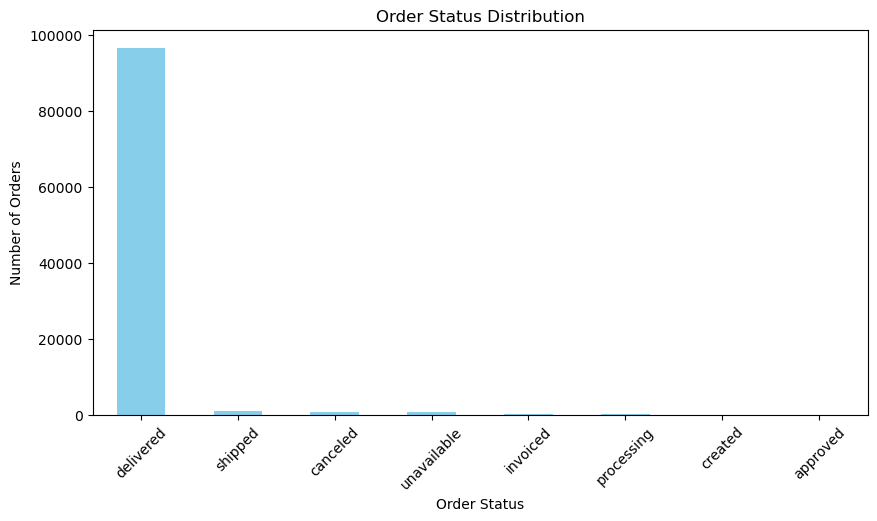

In [51]:
# Distribution of order statuses
order_status_distribution = orders_df['order_status'].value_counts()
print(order_status_distribution)

# Plot the distribution
order_status_distribution.plot(kind='bar', figsize=(10, 5), title="Order Status Distribution", color='skyblue')
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

- Insight: The most common statuses (like "delivered") indicate successful orders, while statuses like "canceled" or "unavailable" may reveal areas for improvement in the process.

order_purchase_year
2016      329
2017    45101
2018    54011
Name: count, dtype: int64


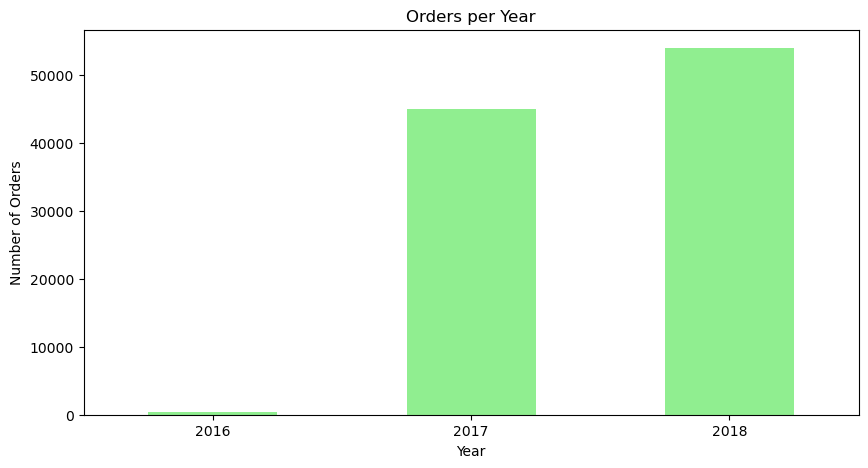

In [70]:
# Orders per year
orders_df['order_purchase_year'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.year
orders_per_year = orders_df['order_purchase_year'].value_counts().sort_index()
print(orders_per_year)

# Plot the orders by year
orders_per_year.plot(kind='bar', figsize=(10, 5), title="Orders per Year", color='lightgreen')
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.show()


- Insight: trends in order volume over time shows positive impact. Significant growth or may align with external factors or business performance

#### Bivariate Analysis

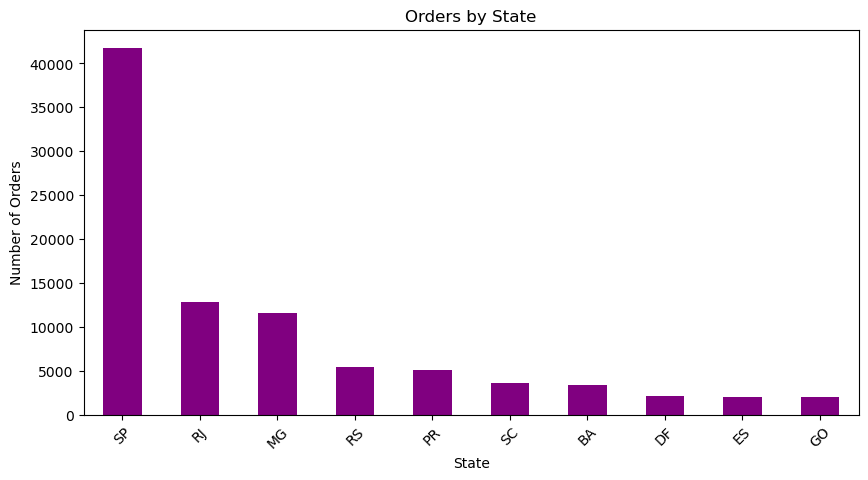

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

In [68]:
# Merge with customers to get customer states
orders_with_states = orders_df.merge(customers_df[['customer_id', 'customer_state']], on='customer_id', how='left')
orders_per_state = orders_with_states['customer_state'].value_counts().head(10)

# Plot order count by state
orders_per_state.plot(kind='bar', figsize=(10, 5), title="Orders by State", color='purple')
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()
orders_per_state

- Insight: High-order volumes in specific states could reflect key markets.

#### Multivariate Analysis

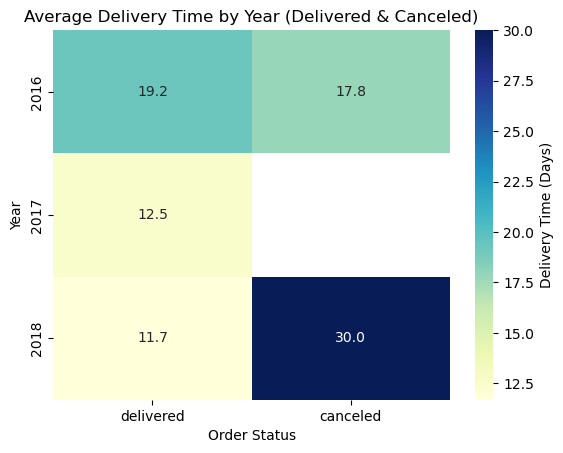

order_status,delivered,canceled
order_purchase_year,,
2016,19.209738,17.8
2017,12.541839,NaN
2018,11.690544,30.0


In [65]:
# Average delivery time grouped by year and status
avg_delivery_time_year_status = orders_df.groupby(['order_purchase_year', 'order_status'])['order_delivery_time'].mean().unstack()
# Filter data for delivered and canceled statuses
filtered_df = avg_delivery_time_year_status[['delivered', 'canceled']]  # Select desired columns

# Heatmap for visualization
sns.heatmap(filtered_df, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Delivery Time (Days)'})
plt.title("Average Delivery Time by Year (Delivered & Canceled)")
plt.xlabel("Order Status")
plt.ylabel("Year")
plt.show()
filtered_df

- Insight: Look for improvements in delivery efficiency over the years for different order statuses. as we can see over the years the average delivered order are lower, it shows that the delivery service get more efficient. but also there's a significant groe in canceled status in 2018 that need furter action

#### Numerical Analysis

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_delivery_time
count,99441,97660,96484,99441,99441.000000,96484.000000
mean,2017-12-31 08:43:12.776581120,2018-01-04 21:45:03.742166528,2018-01-14 12:22:27.911705344,2018-01-24 03:08:37.730111232,2017.539838,12.095031
min,2016-09-04 21:15:19,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,2016.000000,0.000000
25%,2017-09-12 14:46:19,2017-09-15 22:24:45,2017-09-25 22:08:25.750000128,2017-10-03 00:00:00,2017.000000,6.000000
50%,2018-01-18 23:04:36,2018-01-24 16:06:21,2018-02-02 19:32:21,2018-02-15 00:00:00,2018.000000,10.000000
75%,2018-05-04 15:42:16,2018-05-08 13:37:15,2018-05-15 23:08:54.249999872,2018-05-25 00:00:00,2018.000000,15.000000
max,2018-10-17 17:30:18,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,2018.000000,209.000000
std,NaN,NaN,NaN,NaN,0.505007,9.551987


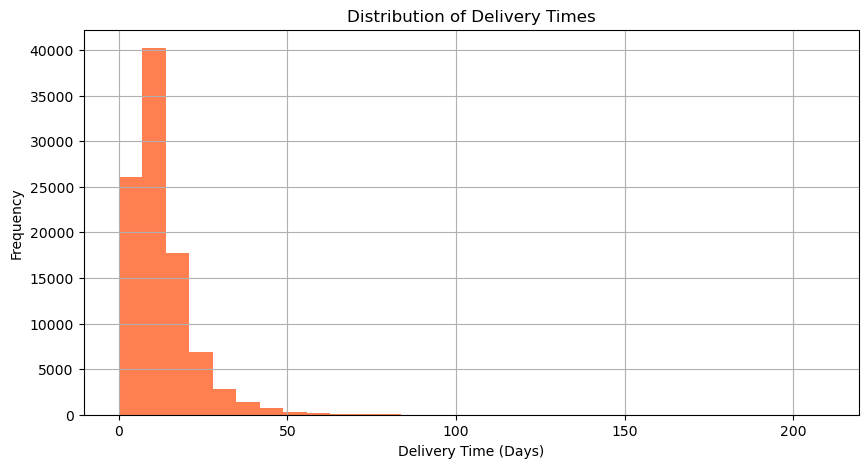

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_delivery_time
count,99441,97660,96484,99441,99441.000000,96484.000000
mean,2017-12-31 08:43:12.776581120,2018-01-04 21:45:03.742166528,2018-01-14 12:22:27.911705344,2018-01-24 03:08:37.730111232,2017.539838,12.095031
min,2016-09-04 21:15:19,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,2016.000000,0.000000
25%,2017-09-12 14:46:19,2017-09-15 22:24:45,2017-09-25 22:08:25.750000128,2017-10-03 00:00:00,2017.000000,6.000000
50%,2018-01-18 23:04:36,2018-01-24 16:06:21,2018-02-02 19:32:21,2018-02-15 00:00:00,2018.000000,10.000000
75%,2018-05-04 15:42:16,2018-05-08 13:37:15,2018-05-15 23:08:54.249999872,2018-05-25 00:00:00,2018.000000,15.000000
max,2018-10-17 17:30:18,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,2018.000000,209.000000
std,NaN,NaN,NaN,NaN,0.505007,9.551987


In [63]:
# Plot delivery time distribution
orders_df['order_delivery_time'].hist(bins=30, figsize=(10, 5), color='coral')
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Frequency")
plt.show()
orders_df.describe()

- Insight: Most orders are delivered within a specific range, but outliers may indicate delays or inefficiencies. and as we can see the average order was delivered in 12 days

#### Categorical Analysis

In [64]:
# Proportions of order statuses
status_proportions = orders_df['order_status'].value_counts(normalize=True) * 100
status_proportions

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64

- Insight: A high proportion of "delivered" orders reflects successful fulfillment. Monitor smaller percentages for canceled or unavailable orders.

## Explanatory Data Analysis & Visualization

| Field of analysis | Dataset | Analysis |
|---|---|---|
| Product Performance | `order_items_df` + `products_df` + `product_category_df` | Product category performance & popularity and revenue analysis |
| Revenue Analysis | `order_items_df` + `order_payments_df` | Revenue trends and payment methods|
| Delivery Times and Reviews | `orders_df` + `order_reviews_df` | Delivery performance, customer satisfaction, review analysis |
| Geographical Trends | `customers_df` + `geolocation_df` + `orders_df` + `order_payments_df` | Regional sales, customer distribution, location-based insights |
| Customer Behavior | `customers_df` + `orders_df` | RFM analysis |

1. Top Products categories that give highest total Money
2. Top Payment methods used and gives highest revenue
3. Analysis on the connection between Delivery Times and Reviews
5. Top states with higest number of customer and give total highest money
5. RFM Analysis to show best customer

#### 1. Product Performance

In [32]:
# Merge order_items_df with products_df on 'product_id'
product_order_data = order_items_df.merge(
    products_df, 
    on='product_id', 
    how='inner'
)

product_order_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


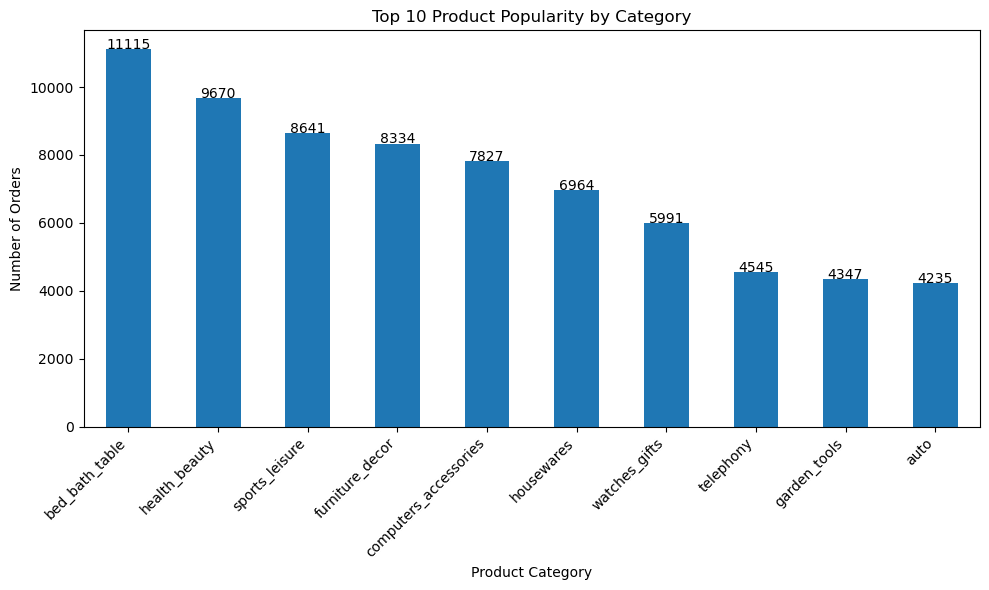

In [33]:
# Popular products
category_popularity = product_order_data['product_category_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = category_popularity.plot(kind='bar', title="Top 10 Product Popularity by Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")

for i, count in enumerate(category_popularity):
    ax.text(i, count + 5, str(count), ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


From the chart above we could see that bed_bath_table was the most popular product category, followed by healt_beauty, sport_leisure, furniture_decor, and computer accessories

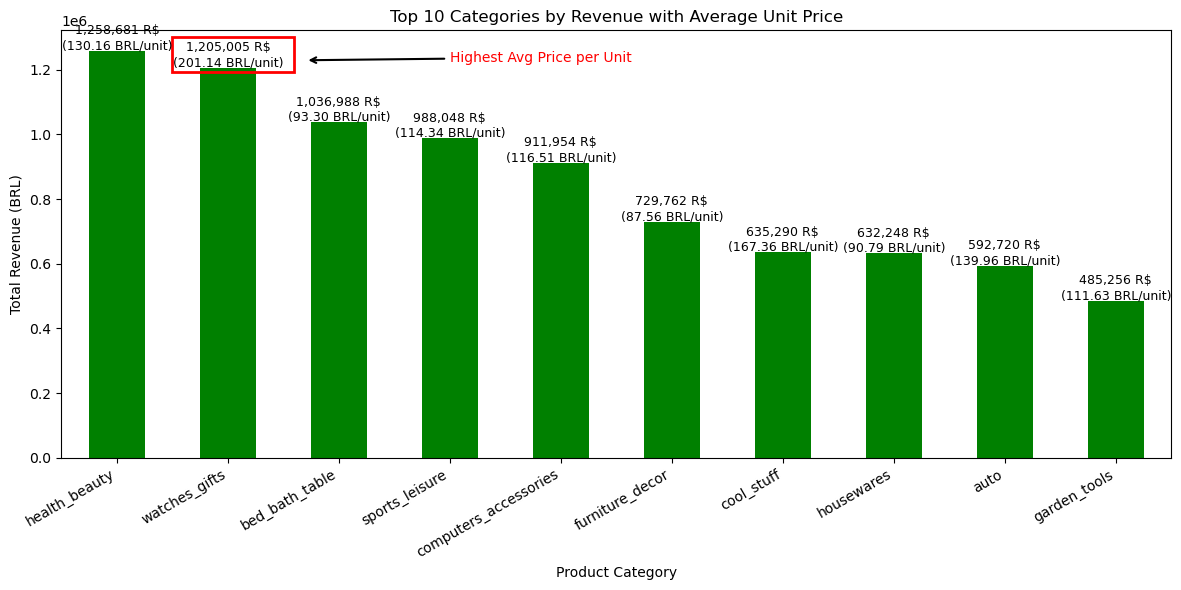

In [ ]:
# Calculate revenue and average price per unit for each category
category_revenue = product_order_data.groupby('product_category_name').agg(
    total_revenue=('price', 'sum'),
    avg_unit_price=('price', 'mean')
).sort_values(by='total_revenue', ascending=False)

# Select the top 10 categories
top_10_categories = category_revenue.head(10)

plt.figure(figsize=(12, 6))
ax = top_10_categories['total_revenue'].plot(kind='bar', color='green', title="Top 10 Categories by Revenue with Average Unit Price")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (BRL)")

# Add annotations for revenue and unit price
for i, (revenue, avg_price) in enumerate(zip(top_10_categories['total_revenue'], top_10_categories['avg_unit_price'])):
    ax.text(i, revenue + 5000, f"{int(revenue):,} R$\n({avg_price:.2f} BRL/unit)", ha='center', fontsize=9)

# Highlight the most expensive product category
most_expensive_category = "watches_gifts"
if most_expensive_category in top_10_categories.index:
    idx = top_10_categories.index.tolist().index(most_expensive_category)
    x_coord = idx  # x-coordinate of the bar
    y_coord = top_10_categories.loc[most_expensive_category, 'total_revenue'] # y-coordinate of the bar

    # Draw a circle around the bar
     # Create a rectangle patch (adjust width and height as needed)
    rectangle = patches.Rectangle(xy=(x_coord-0.5, y_coord*0.99),
                                 width=1.1, height=y_coord * 0.09,  # Adjust width and height
                                 color='red', fill=False, linewidth=2, linestyle='-')
    plt.gca().add_artist(rectangle)


    # Add an arrow pointing to the bar
    plt.annotate(
        "Highest Avg Price per Unit",
        xy=(x_coord*1.7, y_coord*1.02),
        xytext=(x_coord + 2, y_coord + 19800),  # Adjust the annotation position
        arrowprops=dict(facecolor='black', arrowstyle="->", linewidth=1.5),
        fontsize=10,
        color='red'
    )

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

from the chart above we could se that product category health_beauty was gives the highest revenue, followed by watches_gifts, bed_bath_table, sport_leisure, and computer_accessories. where watches_gifts was the most expensive product with the highest average price per unit 

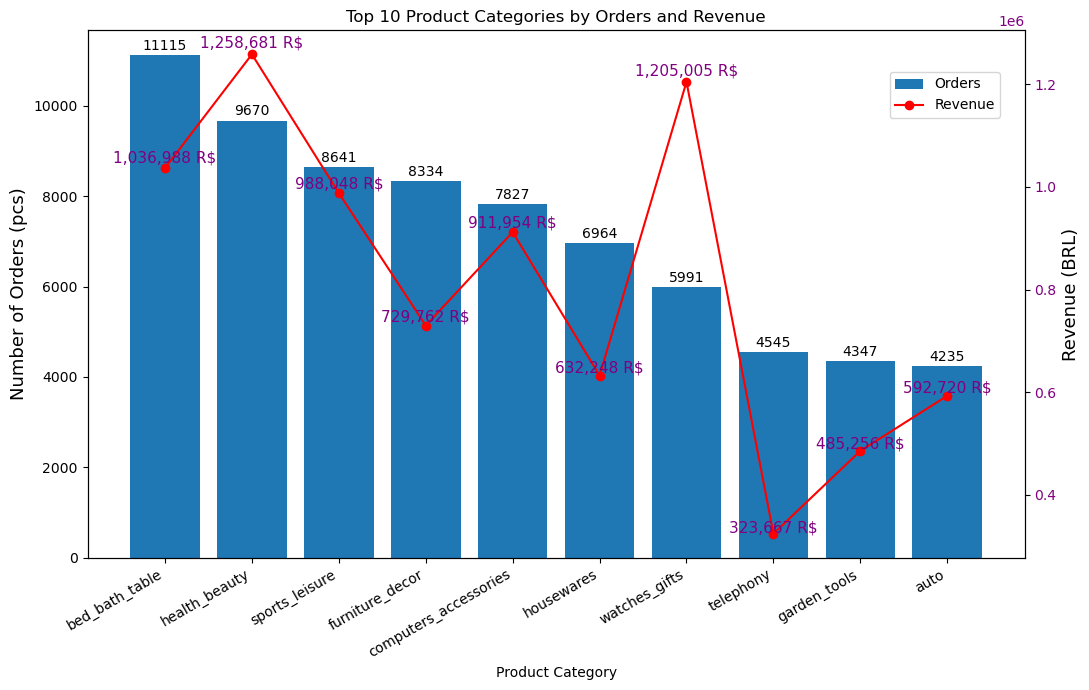

In [36]:
# Prepare the top 10 popularity data
top_10_popularity = product_order_data['product_category_name'].value_counts().head(10).reset_index()
top_10_popularity.columns = ['product_category_name', 'orders']

combined_data = top_10_popularity.merge(
    category_revenue.reset_index(),
    on='product_category_name',
    how='left'
).fillna(0)

# Sort by number of orders for better alignment
combined_data = combined_data.sort_values(by='orders', ascending=False)

# Data for plotting
categories = combined_data['product_category_name']
orders = combined_data['orders']
revenues = combined_data['total_revenue']

fig, ax1 = plt.subplots(figsize=(11, 7))

ax1.bar(categories, orders, label='Orders')
ax1.set_xlabel("Product Category")
ax1.set_ylabel("Number of Orders (pcs)",size = 13)
ax1.tick_params(axis='y')
ax1.set_title("Top 10 Product Categories by Orders and Revenue")
plt.xticks(rotation=30, ha='right')

for i, v in enumerate(orders):
    ax1.text(i, v + 50, f'{v}', ha='center', va='bottom', fontsize=10, color='black')

# Plot the revenues (right y-axis)
ax2 = ax1.twinx()
ax2.plot(categories, revenues, color='red', marker='o', label='Revenue')
ax2.set_ylabel("Revenue (BRL)", color='black', size = 13)
ax2.tick_params(axis='y', labelcolor='purple')

for i, v in enumerate(revenues):
    ax2.text(i, v*1.01, f'{int(v):,} R$', ha='center', rotation=0, fontsize=11, color='purple')

# Legends for clarity
fig.legend(loc='upper right', bbox_to_anchor=(0.92, 0.9))


fig.tight_layout()
plt.show()


From the chart, we observe:

1. Health & Beauty: This category ranks as the 2nd most popular in terms of orders but generates the highest revenue, indicating higher unit prices or larger basket sizes in this category.

2. Discrepancy Between Popularity and Revenue: Categories with the highest number of orders, such as bed_bath_table or sports_leisure, contribute less revenue compared to health_beauty, which suggests these categories may have lower average order values or unit prices. Meanwhile, watches_gifts have the highest average order values but not so popular

Business Recommendations:
- Problem Statement: How can we maximize revenue from the most lucrative categories?
- Solution:
    - Increase the visibility of health_beauty and watches_gifts products through targeted marketing campaigns.
    - Partner with premium health and beauty brands and watches to expand the product offering.
    - Leverage customer data to personalize recommendations in this category, encouraging higher spending.

- Problem Statement: How can we improve profitability in categories with high order volumes but lower revenues?
- Solution:
    - Assess pricing strategies for categories like bed_bath_table or sports_leisure and consider bundling or upselling to increase average order values.
    - Introduce dynamic pricing or loyalty discounts for frequent buyers in these categories to boost revenue without sacrificing volume.

### 2. Revenue Analysis

#### Revenue Trends Over Time

In [38]:
# Merge orders_df with order_items_df and order_payments_df
revenue_data = order_items_df.merge(
    order_payments_df[['order_id', 'payment_value']], 
    on='order_id', 
    how='inner'
).merge(
    orders_df[['order_id', 'order_purchase_timestamp']], 
    on='order_id', 
    how='inner'
)

In [125]:
revenue_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_value,order_purchase_timestamp,year,quarter,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,2017-09-13 08:59:02,2017,3,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,2017-04-26 10:53:06,2017,2,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,2018-01-14 14:33:31,2018,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,2018-08-08 10:00:35,2018,3,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,2017-02-04 13:57:51,2017,1,2


In [42]:
revenue_data[(revenue_data['month']==9) * (revenue_data['year']==2018)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_value,order_purchase_timestamp,year,quarter,month
38848,54282e97f61c23b78330c15b154c867d,1,b98992ea80b467987a7fbb88e7f2076a,25be943a321c8938947bdaabca979a90,2018-09-05 17:30:54,145.0,21.46,166.46,2018-09-03 09:06:57,2018,3,9


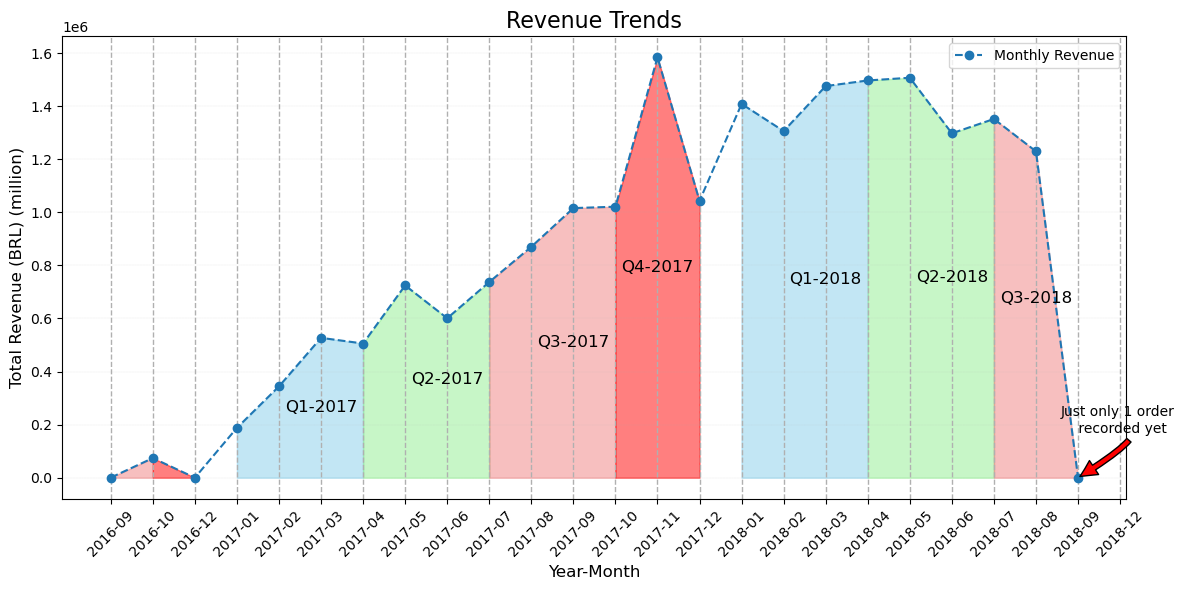

In [45]:
# Create new columns for year, quarter, and month
revenue_data['year'] = revenue_data['order_purchase_timestamp'].dt.year
revenue_data['quarter'] = revenue_data['order_purchase_timestamp'].dt.quarter
revenue_data['month'] = revenue_data['order_purchase_timestamp'].dt.month

# Group by year and quarter for quarterly revenue
revenue_quarterly = (
    revenue_data.groupby(['year', 'quarter'])['payment_value']
    .sum()
    .reset_index()
    .sort_values(['year', 'quarter'])
)
revenue_quarterly.columns = ['Year', 'Quarter', 'Total Revenue']
revenue_quarterly['Year-Quarter'] = revenue_quarterly['Year'].astype(str) + " Q" + revenue_quarterly['Quarter'].astype(str)

# Group by year and month for monthly revenue
revenue_monthly = (
    revenue_data.groupby(['year', 'month'])['payment_value']
    .sum().reset_index().sort_values(['year', 'month']))

revenue_monthly.columns = ['Year', 'Month', 'Total Revenue']
# Ensure Month is padded to two digits
revenue_monthly['Year-Month'] = (
    revenue_monthly['Year'].astype(str) + "-" + revenue_monthly['Month'].astype(str).str.zfill(2)
)

# Plot revenue trends by month
plt.figure(figsize=(12, 6))
# Monthly plot
plt.plot(
    revenue_monthly['Year-Month'],
    revenue_monthly['Total Revenue'],
    marker='o',
    #color='blue',
    label="Monthly Revenue",
    linestyle='dashed',
)

## Block shading for quarter
quarter_colors = ['skyblue', 'lightgreen', 'lightcoral', 'red']
# Loop through quarters and create shaded areas
for i, row in revenue_quarterly.iterrows():
    year, quarter = row['Year'], row['Quarter']
    start_month = (quarter - 1) * 3 + 1
    end_month = start_month + 3

    # Filter the monthly data for the current quarter and year
    quarter_data = revenue_monthly[
        (revenue_monthly['Year'] == year) & 
        (revenue_monthly['Month'] >= start_month) & 
        (revenue_monthly['Month'] <= end_month)
    ]

    if not quarter_data.empty:
        # Create the shaded area
        plt.fill_between(
            quarter_data['Year-Month'],
            0,
            quarter_data['Total Revenue'],
            color=quarter_colors[quarter - 1],
            alpha=0.5,
        )

        if year > 2016:
            # Add text label for the quarter inside the box
            plt.text(
                quarter_data['Year-Month'].iloc[len(quarter_data) // 2],
                quarter_data['Total Revenue'].max() * 0.5,  # Center of the shaded area
                f"Q{quarter}-{year}",
                color='black',
                fontsize=12,
                ha='center',
                va='center',
            )

# Add arrow annotation to point to "2018-9"
plt.annotate(
    "Just only 1 order \n recorded yet",  # Text to display
    xy=("2018-09", revenue_monthly[revenue_monthly['Year-Month'] == "2018-09"]['Total Revenue'].values[0]),  # Point location
    xytext=("2018-12", revenue_monthly['Total Revenue'].max() * 0.1),  # Arrow's start position
    arrowprops=dict(
        facecolor='red', 
        shrink=0.05, 
        edgecolor='black',
        connectionstyle="arc3,rad=-3"  # Curved arrow
    ),
    fontsize=10,
    color='black',
    ha='center',
    va='bottom'
)

# Add gridlines for better visibility of the points
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.1)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=1)

# Title, labels, and formatting
plt.title("Revenue Trends", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Revenue (BRL) (million)", fontsize=12)
plt.xticks(rotation=45)
#plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


1. Significant Growth in Q4-2017:
    - Q4-2017 experienced the highest revenue, likely due to seasonal factors such as holiday shopping (e.g., Christmas) and year-end sales promotions.
    - This indicates a strong correlation between seasonal trends and revenue spikes.

2. Consistent Growth in 2018 (Q1-Q3):
    - Revenue in Q1, Q2, and Q3 of 2018 surpassed the corresponding quarters in 2017, demonstrating a sustained growth trajectory.
    - This suggests that the business has successfully retained customers and grown its customer base.

3. Anomaly in September 2018:
    - Only one recorded sale in September 2018 is unusual. This could indicate data recording issues, operational disruptions, or a temporary dip in demand.

4. Missed Opportunity in Q4-2018:
    - Without data for Q4-2018, it is unclear whether the seasonal trends observed in Q4-2017 can be replicated or improved upon.

Business Recomendation
- Problem Statement: How can the business optimize its strategy to consistently replicate or exceed the Q4-2017 revenue during seasonal peaks?
- solution:
    - Plan Ahead for Q4 Promotions: Launch holiday campaigns earlier, targeting both existing customers and new audiences.
    - Offer special bundles, flash sales, or loyalty rewards for high-value customers.

- Problem Statement: What strategies can ensure consistent revenue growth across all quarters, reducing reliance on Q4 performance?
- solution:
    - Strengthen customer retention strategies with Loyalty Programs: Develop reward systems to encourage repeat purchases throughout the year.
    - Personalized Marketing: Use customer purchase data to tailor promotions and product recommendations.
    - Focus on Quarterly Growth with quarterly campaigns: Launch thematic campaigns for Q1-Q3 to maintain momentum, such as back-to-school promotions, summer sales, or end-of-financial-year offers.

#### Payment Methods Distribution

In [148]:
# Merge used dataframe
payment_method_revenue_data = order_payments_df.merge(
    orders_df, 
    on='order_id', 
    how='inner'
)

In [149]:
payment_method_revenue_data['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [150]:
payment_method_revenue_data[payment_method_revenue_data['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaT,NaT,2018-09-10
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaT,NaT,2018-09-12
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaN,NaT,NaT,2018-09-11


since the 'not_defined' payment type are 0, and also the order was cancelled, so we just drop the data

In [151]:
payment_method_revenue_data = payment_method_revenue_data.drop(payment_method_revenue_data[payment_method_revenue_data['payment_type'] == 'not_defined'].index)

In [152]:
payment_method_revenue_data['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

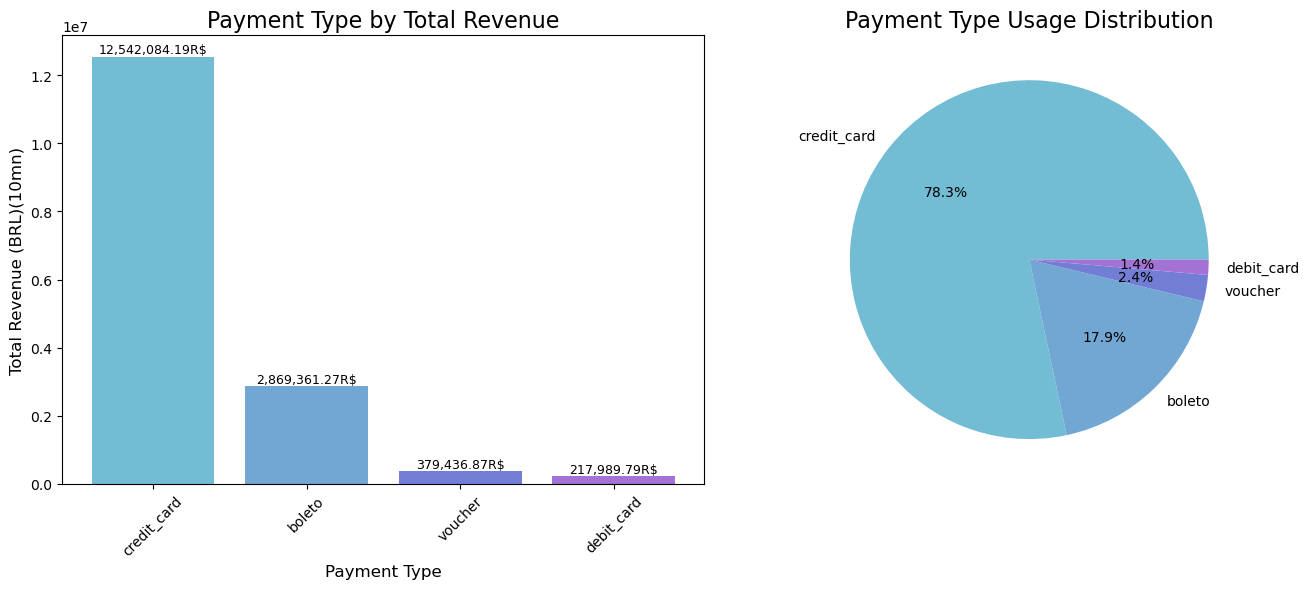

In [153]:
payment_method_revenue = payment_method_revenue_data.groupby('payment_type')['payment_value'].sum().reset_index()
payment_method_revenue = payment_method_revenue.sort_values(by='payment_value', ascending=False)
payment_types = payment_method_revenue['payment_type']
payment_values = payment_method_revenue['payment_value']

# Calculate percentages for pie chart
payment_value_percentages = [value / sum(payment_values) * 100 for value in payment_values]

# Figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for payment value
axs[0].bar(payment_types, payment_values, color=['#72BCD4', '#72A7D4', '#727ED4', '#A372D4'])
axs[0].set_title("Payment Type by Total Revenue", fontsize=16)
axs[0].set_ylabel("Total Revenue (BRL)(10mn)", fontsize=12)
axs[0].set_xlabel("Payment Type", fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
for i, value in enumerate(payment_values):
    axs[0].text(i, value + 100000, f"{value:,.2f}R$", ha='center', fontsize=9)

# Pie chart for payment type usage
axs[1].pie(payment_values, labels=payment_types, autopct='%1.1f%%', colors=['#72BCD4', '#72A7D4', '#727ED4', '#A372D4'])
axs[1].set_title("Payment Type Usage Distribution", fontsize=16)


# Adjust layout
plt.tight_layout()
plt.show()


- Credit cards account for the overwhelming majority of revenue, contributing over 12.5 million BRL (~79% of total payment value). This indicates that credit cards are the preferred payment method for customers.
- Boleto (bank slips) is the second most significant payment method, contributing around 2.87 million BRL (~18% of total payment value).
- Voucher and debit card payments have a minimal impact on total revenue, with contributions of less than 3%.

Customer Preferences:
- The dominance of credit card payments suggests that customers prefer flexibility and the convenience of deferred payments over upfront payments or alternative methods.

### 3. Delivery Times and Review

In [156]:
# Merge orders_df with order_reviews_df on 'order_id'
orders_delivery_review_df = orders_df.merge(
    order_reviews_df, 
    on='order_id', 
    how='left')

orders_delivery_review_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51


#### Delivery Performance

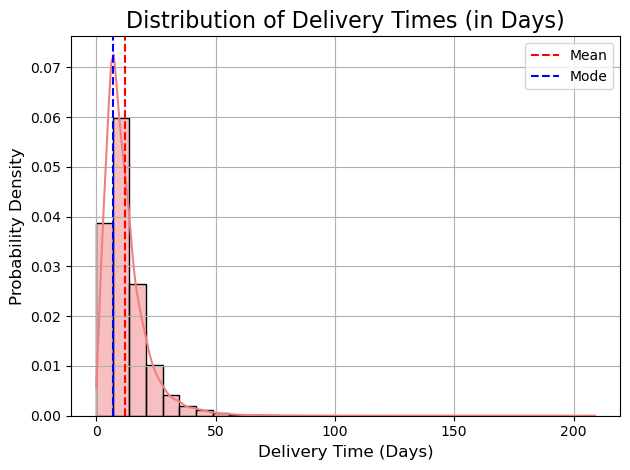

count    97013.000000
mean        12.100956
std          9.548199
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64
Mode of Delivery Time: 7.0 days


In [168]:
# Calculate delivery time in days (assuming you have already done this)
orders_delivery_review_df['delivery_time'] = (orders_delivery_review_df['order_delivered_customer_date'] - orders_delivery_review_df['order_purchase_timestamp']).dt.days

# Plot the distribution of delivery times with seaborn
delivery_time_data = orders_delivery_review_df['delivery_time']
mean_delivery_time = delivery_time_data.mean()
mode_delivery_time = delivery_time_data.mode().values[0]  # Get the first mode value

sns.histplot(
    data=orders_delivery_review_df,
    x="delivery_time",
    bins=30,
    color="lightcoral",
    edgecolor="black",
    kde=True,
    stat="density"
)

# Add vertical lines for mean and mode
plt.axvline(mean_delivery_time, color='red', linestyle='dashed', label='Mean')
plt.axvline(mode_delivery_time, color='blue', linestyle='dashed', label='Mode')
plt.legend()

# Customize plot elements
plt.title("Distribution of Delivery Times (in Days)", fontsize=16)
plt.xlabel("Delivery Time (Days)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate summary statistics for delivery time
delivery_time_stats = orders_delivery_review_df['delivery_time'].describe()
print(delivery_time_stats)

# Print the mode value separately
print(f"Mode of Delivery Time: {mode_delivery_time} days")

as we can see that,
- The average (mean) delivery time is approximately 12.1 days, with the most frequent (mode) delivery time being 7 days.
- The median delivery time is 10 days, indicating that half of the deliveries are completed within this time frame.
- Delivery times range from 0 days (same-day delivery) to a maximum of 209 days, suggesting significant variability in the delivery process.
- The interquartile range (IQR) is 6 to 15 days, meaning most deliveries fall within this time frame, but outliers extend the range considerably.
- A maximum delivery time of 209 days highlights extreme cases of delayed deliveries that might negatively impact customer satisfaction.
- The standard deviation of 9.5 days indicates notable variability, which might be due to regional disparities, logistical inefficiencies, or specific product categories.

Customer Expectations:
- With a mode of 7 days, it is reasonable to assume that many customers expect delivery within a week. Longer delivery times, especially those exceeding the IQR, may lead to dissatisfaction.

#### Customer Statisfaction

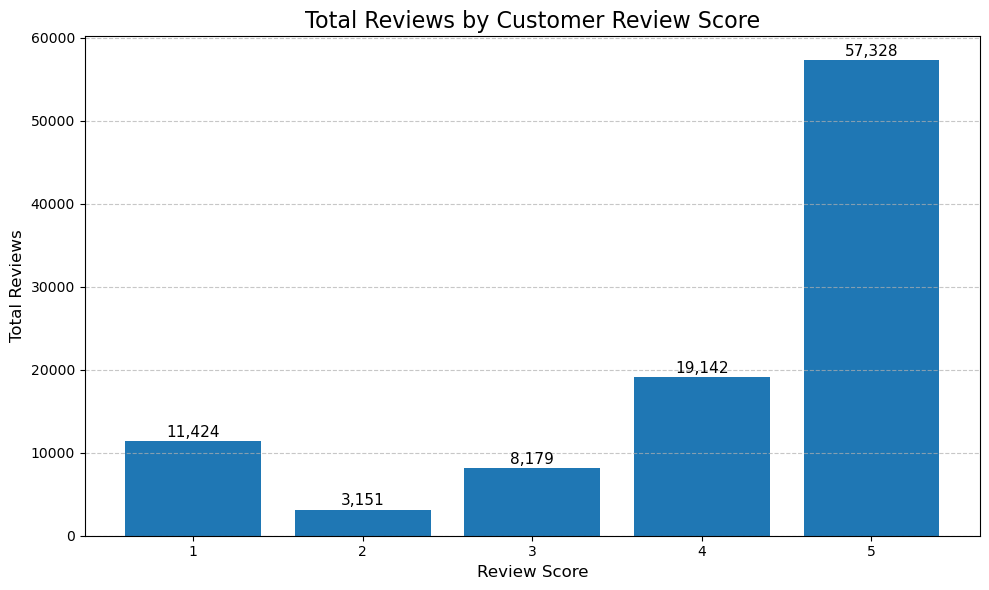

In [180]:
# Group by review score and calculate the total reviews for each score
total_score = orders_delivery_review_df.groupby('review_score')['order_id'].count().reset_index()

# Plot the total number of reviews by review score
plt.figure(figsize=(10, 6))
plt.bar(total_score['review_score'], total_score['order_id'])
plt.title("Total Reviews by Customer Review Score", fontsize=16)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Total Reviews", fontsize=12)

# Add data labels (total reviews) on top of each bar
for i, value in enumerate(total_score['order_id']):
    plt.text(total_score['review_score'][i], value + 500, f"{value:,}", ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The distribution of customer review scores reveals that the highest number of reviews, 57,328, were 5-star ratings, indicating strong customer satisfaction for a majority of orders. This is followed by 4-star reviews at 19,142, further highlighting positive feedback. However, there are notable proportions of low ratings: 1-star reviews account for 11,424, 3-star reviews for 8,317, and 2-star reviews for 3,151. This suggests areas for improvement, particularly among dissatisfied customers (1 and 2-star ratings), which can be investigated further to enhance the overall customer experience.

#### Relationship between Delivery Time and Customer Statisfaction

In [216]:
# Group by review score and calculate the average delivery time for each score
avg_delivery_by_score = orders_delivery_review_df.groupby('review_score')['delivery_time'].mean().reset_index()

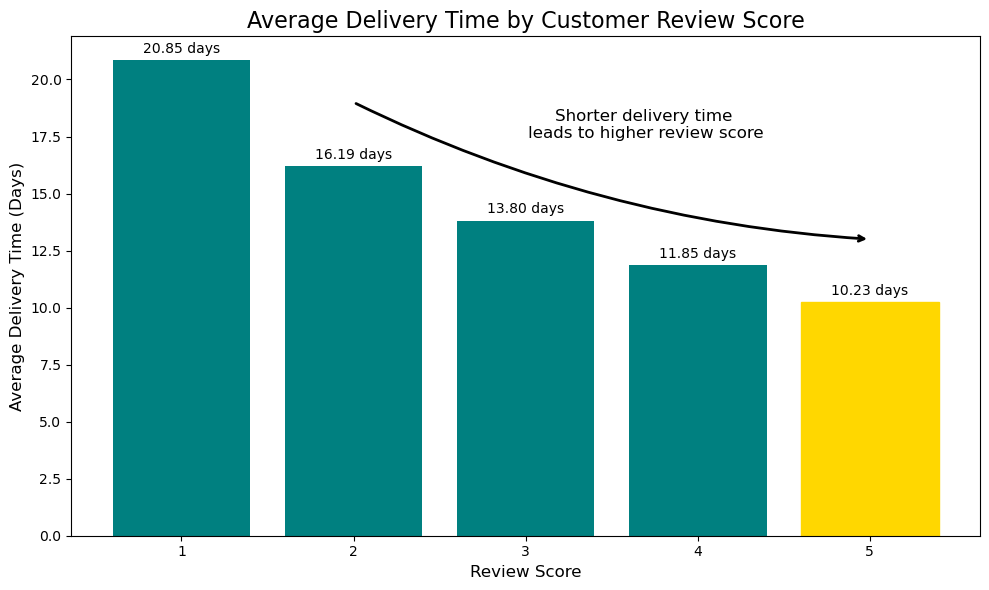

In [213]:
# Plot the average delivery time by review score
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_delivery_by_score['review_score'], avg_delivery_by_score['delivery_time'], color='teal')

# Add data labels (average delivery time) on top of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, 
             f"{bar.get_height():.2f} days", ha='center', fontsize=10, va='bottom')
    
    five_star = avg_delivery_by_score.loc[i, 'review_score']
    if five_star == 5:
        bar.set_color('gold')  # Set color to gold for bar with review score 5

# Add a curve arrow and text annotation
plt.annotate('', xy=(2, 19), xytext=(5, 13), 
             arrowprops=dict(facecolor='black', lw=2, 
                             arrowstyle='<-', connectionstyle="arc3,rad=-0.1"))

plt.text(3.7, 18, "Shorter delivery time \nleads to higher review score", 
         fontsize=12, color='black', ha='center', va='center')

# Add titles and labels
plt.title("Average Delivery Time by Customer Review Score", fontsize=16)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Average Delivery Time (Days)", fontsize=12)

plt.tight_layout()
plt.show()

from the chart, we observe that as the review score increases, the average delivery time decreases.
- 5-star reviews indicate high customer satisfaction, where the delivery time is relatively fast (around 10.23 days). 1-star reviews, on the other hand, are associated with a much longer delivery time (around 20.85 days), which might indicate frustration or dissatisfaction due to delayed delivery.
- There is a clear opportunity to enhance customer satisfaction by improving delivery speed. Reducing the delivery time can potentially increase the number of high ratings (5-star reviews).

Business Recomendation:
- Problem Statement: How can we improve delivery times to meet customer expectations, leading to higher satisfaction and, ultimately, better ratings? 
- Solution:
    - Focus on improving the efficiency of the delivery system, either by speeding up - logistics or partnering with faster, more reliable delivery services. Introduce regional warehouses or improve inventory management systems to reduce delivery time.
    - Set Clear Delivery Expectations: Long delivery times may cause dissatisfaction due to unmet expectations. Ensure that customers are given clear delivery time estimates during checkout and have the ability to track their orders in real-time.Implement a notification system to update customers on the delivery progress, which can reduce frustration.
    - Offer discounted rates for premium shipping options or a loyalty program for customers who choose faster delivery methods.

### 4. Geographical Trends

In [ ]:
# Merge customers_df and orders_df on 'customer_id'
customer_order = orders_df.merge(
    customers_df, 
    on='customer_id',
    how='left')
geographical_customer_order_df = customer_order.merge(
    geolocation_df, 
    left_on='customer_zip_code_prefix', 
    right_on='geolocation_zip_code_prefix', 
    how='left')
geographical_customer_order_df = geographical_customer_order_df.merge(
    order_payments_df[['order_id','payment_value']],
    on='order_id',
    how='left'
)

geographical_customer_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,2.00


#### Exploring Regional Sales & Customer Distribution

In [218]:
# Group by state and calculate total sales in each state
regional_sales = geographical_customer_order_df.groupby('customer_state')['payment_value'].sum().reset_index()
regional_sales = regional_sales.sort_values(by='payment_value', ascending=False)

In [220]:
customer_distribution = geographical_customer_order_df.groupby('customer_state')['customer_id'].nunique().reset_index()
customer_distribution = customer_distribution.sort_values(by='customer_id', ascending=False)

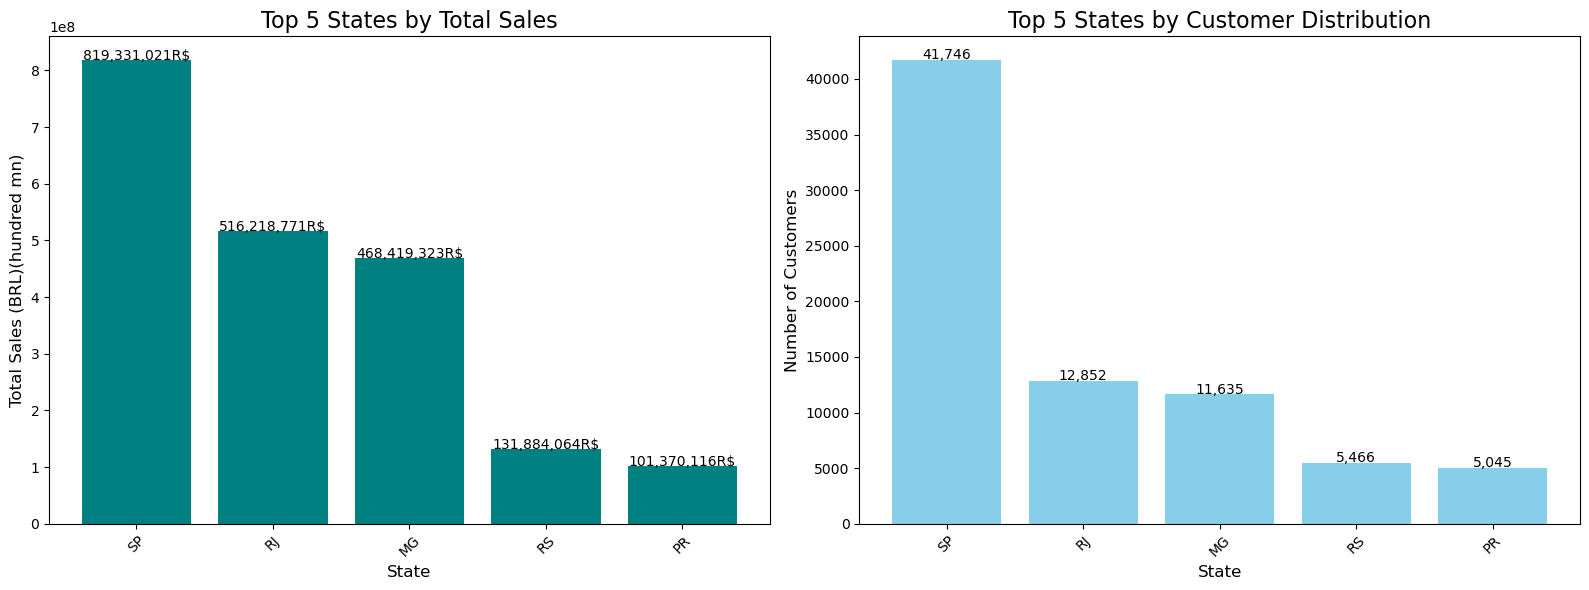

In [228]:
# Sort the data for top 5 states by payment_value and customer_id
top_5_sales = regional_sales.sort_values(by='payment_value', ascending=False).head(5)
top_5_customers = customer_distribution.sort_values(by='customer_id', ascending=False).head(5)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot total sales on the first subplot (ax[0])
bars1 = ax[0].bar(top_5_sales['customer_state'], top_5_sales['payment_value'], color='teal')
ax[0].set_title("Top 5 States by Total Sales", fontsize=16)
ax[0].set_xlabel("State", fontsize=12)
ax[0].set_ylabel("Total Sales (BRL)(hundred mn)", fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
for bar in bars1:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 5000, f'{yval:,.0f}R$', ha='center', fontsize=10)

# Plot customer distribution on the second subplot (ax[1])
bars2 = ax[1].bar(top_5_customers['customer_state'], top_5_customers['customer_id'], color='skyblue')
ax[1].set_title("Top 5 States by Customer Distribution", fontsize=16)
ax[1].set_xlabel("State", fontsize=12)
ax[1].set_ylabel("Number of Customers", fontsize=12)
ax[1].tick_params(axis='x', rotation=45)
for bar in bars2:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval + 50, f'{yval:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Based from the chart above, we can observe that;

Revenue Distribution by State:
- The state of São Paulo (SP) leads in total sales with a significant margin, contributing approximately BRL 819 million, which is far higher than the other states. Rio de Janeiro (RJ) comes second with BRL 516 million in sales.
- Other states, such as Minas Gerais (MG) and Rio Grande do Sul (RS), have considerably lower total sales, with MG reaching about BRL 468 million and RS around BRL 132 million.
- The top 3 states (SP, RJ, MG) account for a significant share of the total revenue, indicating that these regions are the most lucrative markets for the company.

Customer Distribution by State:
- São Paulo (SP) also leads in terms of the number of customers, with a customer base of 41,746 customers, followed by Rio de Janeiro (RJ) with 12,852 customers.
- The customer distribution aligns well with the revenue distribution, showing that SP not only generates the highest sales but also has the largest customer base.
- States like Paraná (PR) and Rio Grande do Sul (RS) have significantly fewer customers, with PR having just 5,045 customers and RS around 5,466 customers, suggesting that these markets may be less penetrated.

#### Geospatial Analysis

In [231]:
# Load Brazil's shapefile
brazil_states = gpd.read_file("brazil_states\BRA_adm1.shp")

In [232]:
brazil_states.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,BR.AL,0,None,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.8618, -35.90153 -..."


In [233]:
# Assuming `brazil_states` is your GeoDataFrame
brazil_states['state_code'] = brazil_states['HASC_1'].str.split('.').str[-1]

In [234]:
brazil_states['state_code']

0     AC
1     AL
2     AP
3     AM
4     BA
5     CE
6     DF
7     ES
8     GO
9     MA
10    MS
11    MT
12    MG
13    PA
14    PB
15    PR
16    PE
17    PI
18    RJ
19    RN
20    RS
21    RO
22    RR
23    SP
24    SC
25    SE
26    TO
Name: state_code, dtype: object

In [235]:
# Summarize customer and sales data by state
state_sales = geographical_customer_order_df.groupby('customer_state').agg(
    total_sales=('payment_value', 'sum'),
    num_customers=('customer_id', 'nunique')
).reset_index()

In [236]:
# Merge shapefile with sales and customer data
brazil_map_data = brazil_states.merge(state_sales, 
                                      left_on='state_code', 
                                      right_on='customer_state', 
                                      how='left')

In [237]:
# Handle missing data (e.g., fill NaNs with 0)
brazil_map_data['total_sales'] = brazil_map_data['total_sales'].fillna(0)
brazil_map_data['num_customers'] = brazil_map_data['num_customers'].fillna(0)

In [239]:
brazil_map_data.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,state_code,customer_state,total_sales,num_customers
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",AC,AC,1815873.97,81
1,33,BRA,Brazil,2,Alagoas,BR.AL,0,None,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.8618, -35.90153 -...",AL,AL,8475047.38,413
2,33,BRA,Brazil,3,Amapá,BR.AP,0,None,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",AP,AP,1187606.64,68
3,33,BRA,Brazil,4,Amazonas,BR.AM,0,None,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997...",AM,AM,1052239.74,148
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",BA,BA,74145031.23,3380


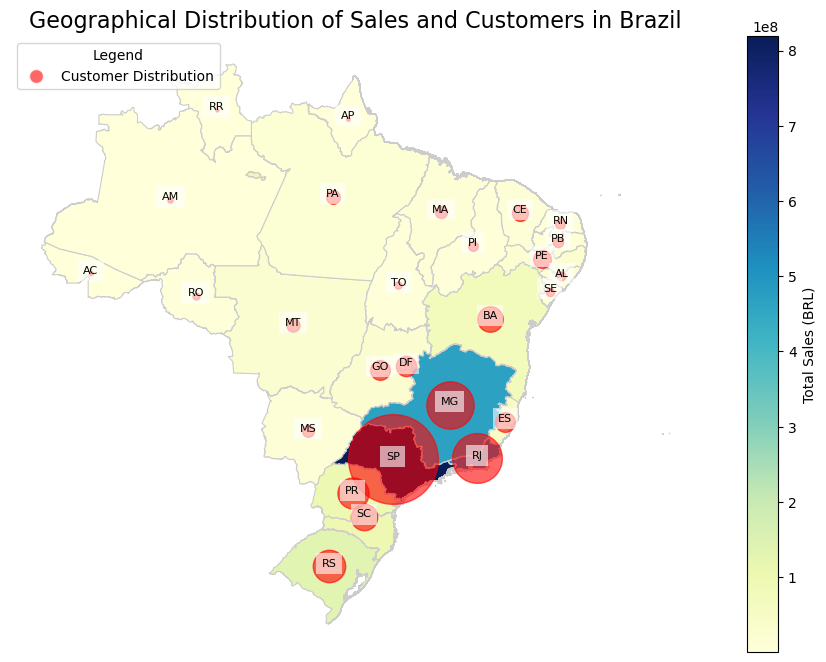

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the states with total sales as the color scale
brazil_map_data.plot(
    column='total_sales',
    cmap='YlGnBu',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Total Sales (BRL)", 'orientation': "vertical"}
)

# Add state centroids with markers for customer distribution
for _, row in brazil_map_data.iterrows():
    if row['geometry'] is not None:  # Skip missing geometries
        plt.text(
            row['geometry'].centroid.x,
            row['geometry'].centroid.y,
            row['state_code'],
            fontsize=8,
            ha='center',
            color='black',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)
        )
        ax.scatter(
            row['geometry'].centroid.x,
            row['geometry'].centroid.y,
            s=row['num_customers'] / 10,  # Adjust marker size
            color='red',
            alpha=0.6
        )

# Add a custom legend for the red circles
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Customer Distribution',
           markerfacecolor='red', markersize=10, alpha=0.6)
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, title="Legend")

# Add titles and labels
plt.title("Geographical Distribution of Sales and Customers in Brazil", fontsize=16)
plt.axis('off')  # Turn off the axes
plt.show()

Based on the visualization we can see that São Paulo and Rio de Janeiro contribute the most to revenue and have the largest customer bases.

Business Recomendation:
- Problem Statement: How can the company strategically reduce its over-reliance on São Paulo (SP) and Rio de Janeiro (RJ) for both sales and customer base, to ensure a more balanced revenue distribution across Brazil by the end of FY 2024?
- Solution:
    - To reduce dependency on São Paulo and Rio de Janeiro, the company should develop and implement region-specific marketing strategies in states like Minas Gerais (MG) and Rio Grande do Sul (RS). These strategies should include targeted online and offline campaigns, partnerships with local businesses, and region-specific discounts. Success should be measured by a 15% increase in sales from these regions by the end of FY 2024.
- Problem Statement: Why is sales performance in Paraná (PR) and Rio Grande do Sul (RS) underwhelming?
- Solution:
    - The company should explore expanding its sales channels in these regions by investing in online platforms and partnering with local retailers. Offering promotions or discounts could also incentivize customers in PR and RS to make purchases. Additionally, a focus on improving logistical networks can help streamline product delivery and improve sales.


##### Folium Geospatial

In [ ]:
# Create a base map centered in Brazil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)  # Adjust zoom level as needed

# Add a choropleth layer for total sales
folium.Choropleth(
    geo_data=brazil_map_data,
    data=brazil_map_data,
    columns=['state_code', 'total_sales'],
    key_on='feature.properties.state_code',  # Match with GeoJSON properties
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Sales (BRL)'
).add_to(m)

# Add markers for customer distribution
for _, row in brazil_map_data.iterrows():
    folium.CircleMarker(
        location=[row['geometry'].centroid.y, row['geometry'].centroid.x],  # Centroid of each state
        radius=row['num_customers'] / 500,  # Scale the size of the marker
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=folium.Popup(f"State: {row['state_code']}<br>Total Sales: {row['total_sales']:.2f}<br>Customers: {row['num_customers']}"),
    ).add_to(m)

# Save map to an HTML file
m.save("brazil_sales_map.html")


### 5. Customer Behavior: RFM Analysis

In [ ]:
#merged needed dataframe
rfm_df = orders_df.merge(
    order_payments_df[['order_id', 'payment_value']],
    on='order_id',
    how='inner'
)

rfm_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12


In [583]:
rfm_df = rfm_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


C:\Users\tohah\AppData\Local\Temp\ipykernel_15016\3242448242.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60, ha='right')
C:\Users\tohah\AppData\Local\Temp\ipykernel_15016\3242448242.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60, ha='right')
C:\Users\tohah\AppData\Local\Temp\ipykernel_15016\3242448242.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=60, ha='right')


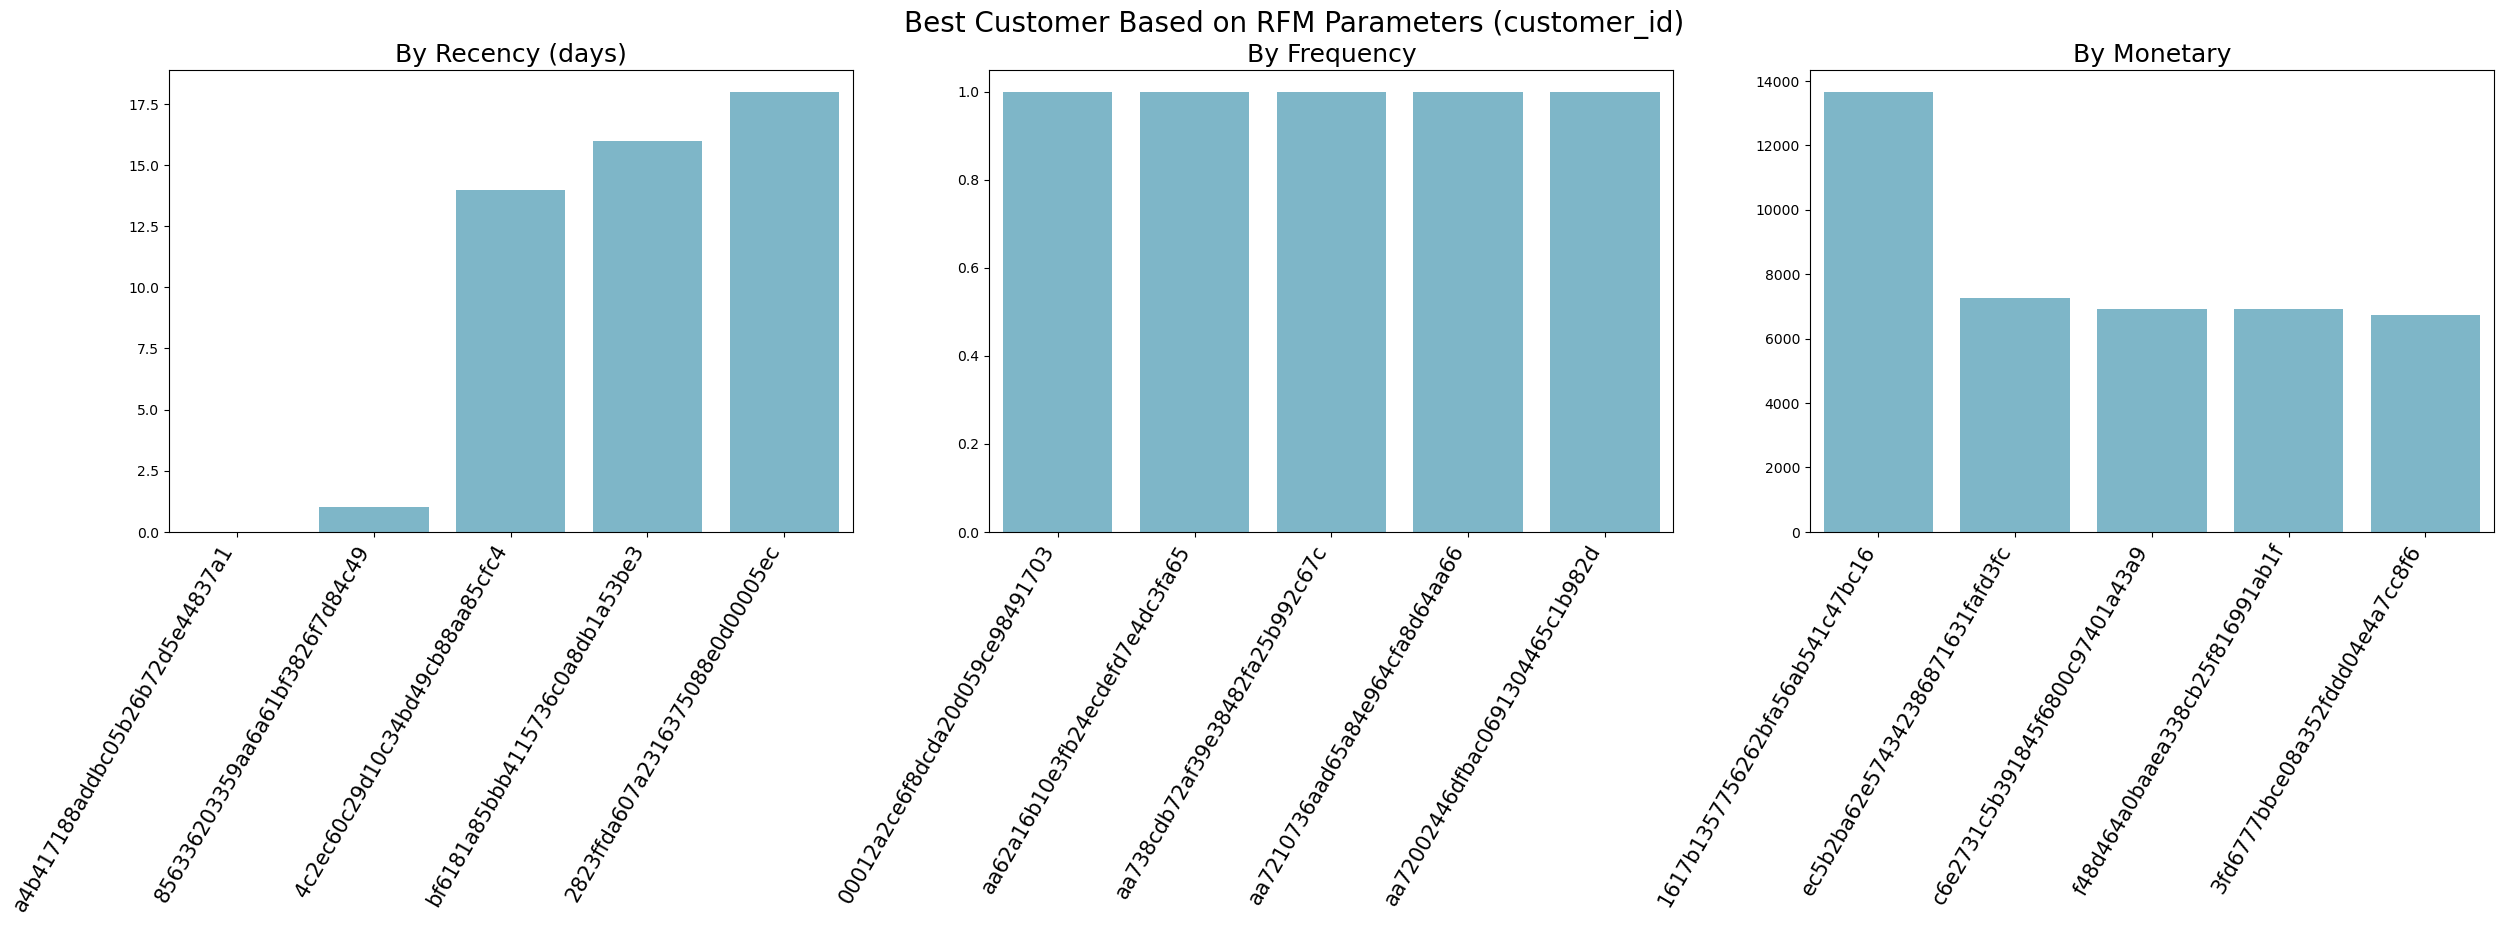

In [591]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60, ha='right')
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
plt.xticks(rotation=60, ha='right')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60, ha='right')
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
plt.xticks(rotation=60,ha='right')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=60, ha='right')


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Based on the Visualization of RFM Analysis:
- Customer Frequency: The data shows that all the customers in the sample have made only one purchase. This suggests that a large proportion of your customer base may be infrequent buyers, potentially indicating a lack of repeat business. The low frequency could be attributed to various factors, such as the nature of the product, lack of customer engagement, or insufficient incentives for returning customers.

- Monetary Value: The monetary values vary significantly, with some customers spending as much as 195.42 BRL in a single transaction. However, others have much lower transaction amounts (e.g., 67.41 BRL). This indicates a high variability in customer spending behavior, which could suggest that some customers are making larger purchases while others are only engaging with lower-value products or services.

- Recency: The recency metric shows that these customers haven’t made recent purchases, with recency ranging from 198 days to 596 days. This means the customers have been inactive for several months. A high recency score indicates that the customers have not engaged with the business recently, which is a critical issue for customer retention and re-engagement.

Business Recomendation:
1. Increase Customer Retention through Engagement Campaigns:
    - Problem: With customers making only one purchase and with significant recency gaps, customer retention seems to be a challenge.
    - Solution: Focus on re-engagement campaigns such as email marketing, loyalty programs, or personalized promotions. You can send out exclusive offers to customers who have not purchased recently, offering discounts, free shipping, or bundled products to encourage them to return. Set a target of re-engaging 30% of inactive customers within the next 3 months.

2. Target High-Value Customers with Premium Offerings:
    - Problem: Some customers are making larger purchases, but the low-frequency and recency patterns suggest that they may not be returning often.
    - Solution: Identify these high-value customers and offer them premium or personalized products. Providing targeted loyalty benefits or early access to new products can incentivize them to become repeat buyers. Consider setting a target to increase repeat purchases by 20% for this segment in the next quarter.

3. Loyalty Programs and Incentives:
    - Problem: The customers have only made one purchase, and there is a risk of them not returning due to lack of incentives.
    - Solution: Introduce a loyalty program that rewards customers for repeat purchases, referrals, or higher spending. For example, customers can earn points for every purchase that can be redeemed for discounts or gifts. This will increase the frequency of purchases and customer lifetime value. Aim to sign up 20% of your customer base for the loyalty program within the next 3 months.

## Conclusion

1. How can we maximize revenue from high-value categories?
    - Recommendation: Invest in targeted marketing and product expansion for categories like health_beauty and watches_gifts. Leverage customer data to personalize recommendations and encourage higher spending.

2. How can we improve profitability in lower-revenue categories?
    - Recommendation: Implement dynamic pricing strategies and explore bundling or upselling opportunities for categories like bed_bath_table and sports_leisure. Offer loyalty discounts to encourage repeat purchases and increase average order value.

3. How can we optimize performance during seasonal peaks and ensure consistent revenue growth throughout the year?
    - Recommendation: Develop strategic marketing campaigns for each quarter, with a focus on holiday seasons and off-peak periods. Implement loyalty programs to retain customers and drive repeat purchases.

4. How can we improve delivery times to enhance customer satisfaction and drive repeat business?
    - Recommendation: Optimize logistics and delivery processes, potentially partnering with faster delivery services. Set clear delivery expectations and provide real-time tracking updates to customers. Consider offering premium shipping options with faster delivery times.

5. How can we reduce over-reliance on some state for sales and customer base?
    - Recommendation: Diversify Revenue Sources Beyond São Paulo and Rio de Janeiro: Implement region-specific marketing campaigns in underperforming states like Minas Gerais and Rio Grande do Sul, with a goal of increasing sales by 15% in these regions by the end of FY 2024.

6. How can we improve customer retention and drive repeat purchases?
    - Recommendation: Implement a robust loyalty program with tiered rewards and personalized offers. Utilize email marketing and targeted promotions to re-engage inactive customers. Analyze customer purchase history to identify upselling and cross-selling opportunities.

In [2]:
!pip freeze > requirements.txt